In [1]:
import numpy as np
import random
import sys
import importlib
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Data.Data import DataLoader

In [2]:
# create an instance of the DataLoader class and initialize 
distortions = ['shot_noise', 'motion_blur']  # desired distortions

# instantiate train and test datasets
train_data_obj = DataLoader('train', distortions)
test_data_obj = DataLoader('test', distortions)

# load data
data_dict = train_data_obj.load()
data_dict_test = test_data_obj.load()


In [3]:
# set sample size
sample_size = 500

# create clean dataset
filtered_clean = data_dict['clean'][:sample_size]

# create noisy dataset
filtered_motion_blur = data_dict['motion_blur'][:sample_size]
filtered_shot_noise = data_dict['shot_noise'][:sample_size]

# alternating between motion_blur and shot_noise photos
filtered_noisy = []

for i in range(sample_size):
    if random.random() < 0.5:  # randomly select motion_blur or shot_noise
        filtered_noisy.append(filtered_motion_blur[i])
    else:
        filtered_noisy.append(filtered_shot_noise[i])


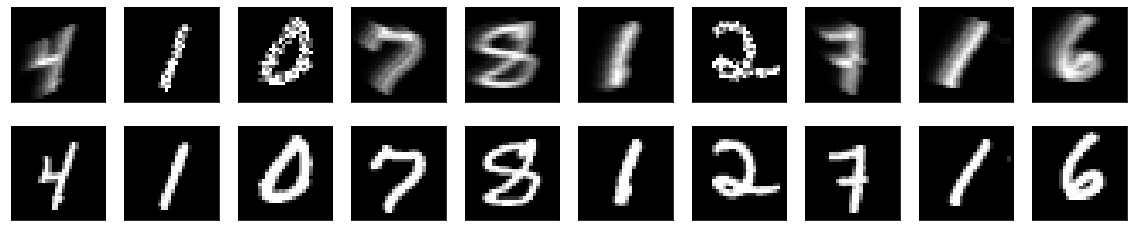

In [4]:
# display corrupted and clean images
DataLoader.display_10(filtered_noisy, filtered_clean)

In [5]:
# for testing only - reinstantiate python modules
from denoiser_model import ConvDenoiser
importlib.reload(sys.modules['model']) 
from denoiser_model import ConvDenoiser

X_noisy = [item['image'] for item in filtered_noisy]
y_noisy = [item['label'] for item in filtered_noisy]

X_clean = [item['image'] for item in filtered_clean]
y_clean = [item['label'] for item in filtered_clean]

denoiser = ConvDenoiser(X_noisy, X_clean, y_noisy, y_clean)

history, score, predictions = denoiser.model(X_noisy, X_clean, y_noisy, y_clean)


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        2368      
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         590080    
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 latent_vector (Dense)       (None, 64)                802880    
                                                                 
Total params: 1,395,328
Trainable params: 1,395,328
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
________________________________

INFO:tensorflow:Assets written to: denoising_autoenconder.model/assets


INFO:tensorflow:Assets written to: denoising_autoenconder.model/assets


16/16 [==============================] - 7s 421ms/step


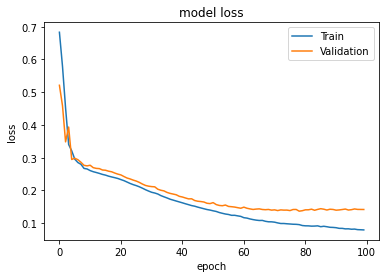

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [7]:
# # for testing only - reinstantiate python modules
# from Data.Data import DataLoader
# importlib.reload(sys.modules['Data.Data'])
# from Data.Data import DataLoader

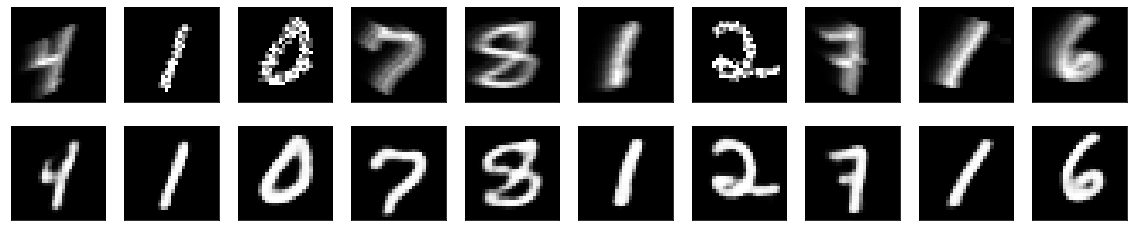

In [9]:
# display predictions against noisy input
DataLoader.display_10(X_noisy, predictions)

In [10]:
# # create train/test datasets
# train_size = 1000
# test_size = 500

# train_ratios = {'clean': 0.8, 'shot_noise': 0.6, 'motion_blur': 0.4}
# test_ratios = {'clean': 0.2, 'shot_noise': 0.4, 'motion_blur': 0.6}

# train_dataset = train_data_obj.create_dataset(train_size, train_ratios)
# test_dataset = test_data_obj.create_dataset(test_size, test_ratios)

In [11]:
# # train set
# X_train = []
# y_train = []

# for item in train_dataset:
#     X_train.append(item['image'])
#     y_train.append(item['label'])

# # test set
# X_test = []
# y_test = []

# for item in test_dataset:
#     X_test.append(item['image'])
#     y_test.append(item['label'])
